**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: (LINK NEEDS FIXING!)

[Lab22](https://atomickitty.ddns.net:8000/user/sensei/files/engr-1330-webroot/engr-1330-webbook/ctds-psuedocourse/docs/8-Labs/Lab8/Lab9_Dev.ipynb?_xsrf=2%7C1b4d47c3%7C0c3aca0c53606a3f4b71c448b09296ae%7C1623531240)

___

# <font color=darkred>Laboratory 22: "On The Virtue and Value of Classification" or "Who Ordered a Classy Fire?" </font>

In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

DESKTOP-EH6HD63
desktop-eh6hd63\farha
C:\Users\Farha\Anaconda3\python.exe
3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)


## Full name: 
## R#: 
## Title of the notebook
## Date: 

![](https://d2slcw3kip6qmk.cloudfront.net/marketing/blog/2018Q2/critical-elements-for-decision-making/operations-webinar-recap-header@2x.png) <br>


## For the last few sessions we have talked about simple linear regression ... <br>

![](https://biol609.github.io/lectures/images/03/simple_regression.jpeg) <br>

### We discussed ...
- __The theory and implementation of simple linear regression in Python__<br>
- __OLS and MLE methods for estimation of slope and intercept coefficients__  <br>    
- __Errors (Noise, Variance, Bias) and their impacts on model's performance__ <br>
- __Confidence and prediction intervals__
- __And Multiple Linear Regressions__
    
 <br> ![](https://memegenerator.net/img/instances/73408711.jpg) <br>

- __What if we want to predict a discrete variable?__

    The general idea behind our efforts was to use a set of observed events (samples) to capture the relationship between one or more predictor (AKA input, indipendent) variables and an output (AKA response, dependent) variable. The nature of the dependent variables differentiates *__regression__* and *__classification__* problems. 
 <br>   ![](https://static.javatpoint.com/tutorial/machine-learning/images/regression-vs-classification-in-machine-learning.png) <br>

    
    Regression problems have continuous and usually unbounded outputs. An example is when you’re estimating the salary as a function of experience and education level. Or all the examples we have covered so far! 
    
    On the other hand, classification problems have discrete and finite outputs called classes or categories. For example, predicting if an employee is going to be promoted or not (true or false) is a classification problem. There are two main types of classification problems:

    - Binary or binomial classification: 
    
    exactly two classes to choose between (usually 0 and 1, true and false, or positive and negative)
    
    - Multiclass or multinomial classification:
    
    three or more classes of the outputs to choose from


- __When Do We Need Classification?__
    
    We can apply classification in many fields of science and technology. For example, text classification algorithms are used to separate legitimate and spam emails, as well as positive and negative comments. Other examples involve medical applications, biological classification, credit scoring, and more.
    
## Logistic Regression

- __What is logistic regression?__
    Logistic regression is a fundamental classification technique. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for users to interpret the results. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems. 
    
<br>    ![](https://www.biolegend.com/Files/Images/BioLegend/blog/122118correlationblog/LinearRegresssion.jpg) <br> 
    



Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence. Logistic regression can be considered a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function. HOW?
Remember the general format of the multiple linear regression model: 
<br> ![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281880/image1_ga8gze.png) <br>

Where, y is dependent variable and x1, x2 ... and Xn are explanatory variables. This was, as you know by now, a linear function. There is another famous function known as the *__Sigmoid Function__*, also called *__logistic function__*. Here is the equation for the Sigmoid function: 
<br> ![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281880/image2_kwxquj.png) <br>

This image shows the sigmoid function (or S-shaped curve) of some variable 𝑥: 
<br> ![](https://files.realpython.com/media/log-reg-1.e32deaa7cbac.png) <br>
As you see, The sigmoid function has values very close to either 0 or 1 across most of its domain. It can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. This fact makes it suitable for application in classification methods since we are dealing with two discrete classes (labels, categories, ...). If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO. This cutoff value (threshold) is not always fixed at 0.5. If we apply the Sigmoid function on linear regression: 
<br>![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281880/image3_qldafx.png) <br>

Notice the difference between linear regression and logistic regression: 
<br>![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png) <br>

logistic regression is estimated using Maximum Likelihood Estimation (MLE) approach. Maximizing the likelihood function determines the parameters that are most likely to produce the observed data. 
    
Let's work on an example in Python! <br>

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQS4dpT6isEOjJZ2WAahxwOHvpAwYq6Khy4TQ&usqp=CAU) <br>

### Example 1: Diagnosing Diabetes <br>

![](https://res.cloudinary.com/grohealth/image/upload/c_fill,f_auto,fl_lossy,h_650,q_auto,w_1085/v1581695681/DCUK/Content/causes-of-diabetes.png) <br>



#### The "diabetes.csv" dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 
*Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.*
#### The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. 

|Columns|Info.|
|---:|---:|
|Pregnancies |Number of times pregnant|
|Glucose |Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
|BloodPressure |Diastolic blood pressure (mm Hg)|
|SkinThickness |Triceps skin fold thickness (mm)|
|Insulin |2-Hour serum insulin (mu U/ml)|
|BMI |Body mass index (weight in kg/(height in m)^2)|
|Diabetes pedigree |Diabetes pedigree function| 
|Age |Age (years)|
|Outcome |Class variable (0 or 1) 268 of 768 are 1, the others are 0|


#### Let's see if we can build a logistic regression model to accurately predict whether or not the patients in the dataset have diabetes or not?
*Acknowledgements:
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.*

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
%matplotlib inline

In [3]:
# Import the dataset:
data = pd.read_csv("diabetes.csv")
data.rename(columns = {'Pregnancies':'pregnant', 'Glucose':'glucose','BloodPressure':'bp','SkinThickness':'skin',
                       'Insulin	':'Insulin','BMI':'bmi','DiabetesPedigreeFunction':'pedigree','Age':'age', 
                              'Outcome':'label'}, inplace = True) 
data.head()

pregnant  glucose  bp  skin  Insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1

In [4]:
data.describe()

pregnant     glucose          bp        skin     Insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       label  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

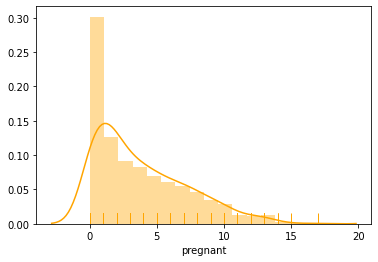

In [5]:
#Check some histograms
sns.distplot(data['pregnant'], kde = True, rug= True, color ='orange') 

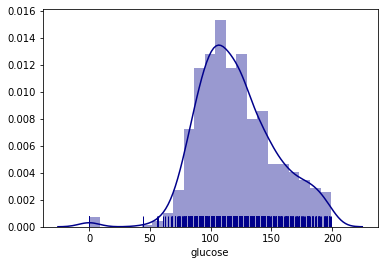

In [6]:
sns.distplot(data['glucose'], kde = True, rug= True, color ='darkblue') 

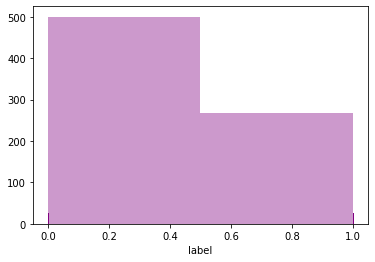

In [63]:
sns.distplot(data['label'], kde = False, rug= True, color ='purple', bins=2) 

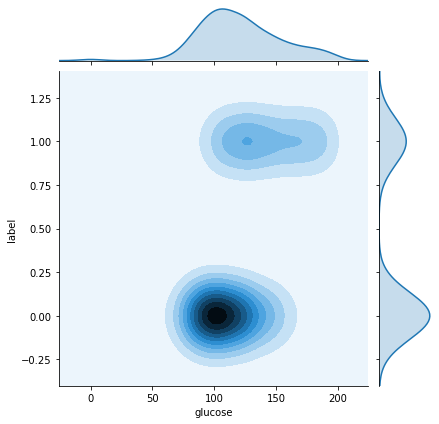

In [8]:
sns.jointplot(x ='glucose', y ='label', data = data, kind ='kde')

#### Selecting Feature: Here, we need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables or predictors).

In [65]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'Insulin', 'bmi', 'pedigree', 'age']
X = data[feature_cols] # Features
y = data.label # Target variable

#### Splitting Data: To understand model performance, dividing the dataset into a training set and a test set is a good strategy. Let's split dataset by using function train_test_split(). You need to pass 3 parameters: features, target, and test_set size. Additionally, you can use random_state to select records randomly. Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing:

In [66]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#### Model Development and Prediction: First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function. Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [67]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
#logreg = LogisticRegression()
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\Farha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


![](https://miro.medium.com/max/1200/1*PM4dqcAe6N7kWRpXKwgWag.png) <br>
- __How to assess the performance of logistic regression?__

    Binary classification has four possible types of results:

    - True negatives: correctly predicted negatives (zeros)
    - True positives: correctly predicted positives (ones)
    - False negatives: incorrectly predicted negatives (zeros)
    - False positives: incorrectly predicted positives (ones)
    
   We usually evaluate the performance of a classifier by comparing the actual and predicted outputsand counting the correct and incorrect predictions. A confusion matrix is a table that is used to evaluate the performance of a classification model. 
    
    <br> ![](https://image.jimcdn.com/app/cms/image/transf/dimension=699x10000:format=png/path/s8ff3310143614e07/image/iab2d53abc26a2bc7/version/1549760945/image.png) <br>

    Some indicators of binary classifiers include the following:

    - The most straightforward indicator of classification accuracy is the ratio of the number of correct predictions to the total number of predictions (or observations). 
    - The positive predictive value is the ratio of the number of true positives to the sum of the numbers of true and false positives.
    - The negative predictive value is the ratio of the number of true negatives to the sum of the numbers of true and false negatives.
    - The sensitivity (also known as recall or true positive rate) is the ratio of the number of true positives to the number of actual positives.
    - The precision score quantifies the ability of a classifier to not label a negative example as positive. The precision score can be interpreted as the probability that a positive prediction made by the classifier is positive.
    - The specificity (or true negative rate) is the ratio of the number of true negatives to the number of actual negatives. 
<br>    ![](https://miro.medium.com/max/936/0*R7idSv1bja3CLC8s.png) <br>
    
The extent of importance of recall and precision depends on the problem. Achieving a high recall is more important than getting a high precision in cases like when we would like to detect as many heart patients as possible. For some other models, like classifying whether a bank customer is a loan defaulter or not, it is desirable to have a high precision since the bank wouldn’t want to lose customers who were denied a loan based on the model’s prediction that they would be defaulters. 
There are also a lot of situations where both precision and recall are equally important. Then we would aim for not only a high recall but a high precision as well. In such cases, we use something called F1-score. F1-score is the Harmonic mean of the Precision and Recall: 
<br> ![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/f1score-300x73.png) <br>
This is easier to work with since now, instead of balancing precision and recall, we can just aim for a good F1-score and that would be indicative of a good Precision and a good Recall value as well.
<br>    ![](https://memegenerator.net/img/instances/85090403.jpg) <br>

#### Model Evaluation using Confusion Matrix: A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [68]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred, y_test)
cnf_matrix

array([[119,  26],
       [ 11,  36]], dtype=int64)

#### Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.
#### Visualizing Confusion Matrix using Heatmap: Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Text(0.5, 257.44, 'Actual label')

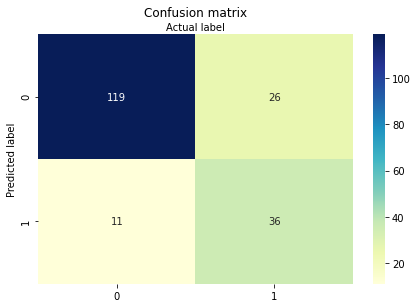

In [69]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

#### Confusion Matrix Evaluation Metrics: Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226
F1-score: 0.6605504587155964


In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       130
           1       0.77      0.58      0.66        62

    accuracy                           0.81       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.80      0.81      0.80       192



![](https://memegenerator.net/img/instances/85090569.jpg)

___
## Example: Credit Card Fraud Detection <br>

![](https://i.pinimg.com/originals/5e/2e/a9/5e2ea94eb6d47c16ece524873234d199.png) <br>



### For many companies, losses involving transaction fraud amount to more than 10% of their total expenses. The concern with these massive losses leads companies to constantly seek new solutions to prevent, detect and eliminate fraud. Machine Learning is one of the most promising technological weapons to combat financial fraud. The objective of this project is to create a simple Logistic Regression model capable of detecting fraud in credit card operations, thus seeking to minimize the risk and loss of the business.

### The dataset used contains transactions carried out by European credit card holders that took place over two days in September 2013, and is a shorter version of a dataset that is available on kaggle at https://www.kaggle.com/mlg-ulb/creditcardfraud/version/3.

### "It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise."


|Columns|Info.|
|---:|---:|
|Time |Number of seconds elapsed between this transaction and the first transaction in the dataset|
|V1-V28 |Result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)|
|Amount |Transaction amount|
|Class |1 for fraudulent transactions, 0 otherwise|


*NOTE: Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.*

<hr>

*__Acknowledgements__*
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

*Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015*

*Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon*

*Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE*

*Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)*

*Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier*

*Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing*

*Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019*

*Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019*

### As you know by now, the first step is to load some necessary libraries:

In [72]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
%matplotlib inline

### Then, we should read the dataset and explore it using tools such as descriptive statistics:

In [73]:
# Import the dataset:
data = pd.read_csv("creditcard_m.csv")
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

### As expected, the dataset has 31 columns and the target variable is located in the last one. Let's check and see whether we have any missing values in the dataset:

In [74]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Great! No missing values!

In [75]:
data.describe()

Time             V1             V2             V3  \
count  140000.000000  140000.000000  140000.000000  140000.000000   
mean    51858.089636      -0.249409       0.017429       0.672713   
std     20867.521978       1.816521       1.614340       1.268657   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     37912.750000      -1.020760      -0.564561       0.170073   
50%     53665.500000      -0.269833       0.104206       0.750038   
75%     69322.000000       1.157985       0.776185       1.363041   
max     83479.000000       1.960497      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  140000.000000  140000.000000  140000.000000  140000.000000   
mean        0.139812      -0.282655       0.078898      -0.117062   
std         1.322410       1.307926       1.284004       1.166853   
min        -5.519697     -42.147898     -26.160506     -31.764946   
25%        -0.714009      -0.903653      -0.662022      -0.603820   
50%         0.167473      -0.314849      -0.176600      -0.064160   
75%         0.993562       0.237514       0.465404       0.409714   
max        16.715537      34.801666      22.529298      36.677268   

                  V8             V9  ...            V21            V22  \
count  140000.000000  140000.000000  ...  140000.000000  140000.000000   
mean        0.065205      -0.092188  ...      -0.039503      -0.118547   
std         1.230046       1.088755  ...       0.721638       0.635371   
min       -73.216718      -9.283925  ...     -34.830382     -10.933144   
25%        -0.131071      -0.714753  ...      -0.226206      -0.548060   
50%         0.080302      -0.154499  ...      -0.059815      -0.095518   
75%         0.374985       0.482352  ...       0.113587       0.301082   
max        20.007208      15.594995  ...      27.202839      10.503090   

                 V23            V24            V25            V26  \
count  140000.000000  140000.000000  140000.000000  140000.000000   
mean       -0.033419       0.012095       0.130218       0.023580   
std         0.591946       0.595760       0.437298       0.492026   
min       -44.807735      -2.836627     -10.295397      -2.534330   
25%        -0.171763      -0.324841      -0.136182      -0.326158   
50%        -0.044999       0.068815       0.166593      -0.064948   
75%         0.083271       0.408740       0.418787       0.287195   
max        19.002942       4.022866       5.541598       3.517346   

                 V27            V28         Amount          Class  
count  140000.000000  140000.000000  140000.000000  140000.000000  
mean        0.000651       0.002244      91.210270       0.001886  
std         0.389003       0.307370     247.334466       0.043384  
min       -22.565679     -11.710896       0.000000       0.000000  
25%        -0.060305      -0.004172       6.000000       0.000000  
50%         0.011781       0.023609      23.920000       0.000000  
75%         0.087053       0.077127      81.000000       0.000000  
max        12.152401      33.847808   19656.530000       1.000000  

[8 rows x 31 columns]

In [76]:
print ('Not Fraud % ',round(data['Class'].value_counts()[0]/len(data)*100,2))
print ()
print (round(data.Amount[data.Class == 0].describe(),2))
print ()
print ()
print ('Fraud %    ',round(data['Class'].value_counts()[1]/len(data)*100,2))
print ()
print (round(data.Amount[data.Class == 1].describe(),2))

Not Fraud %  99.81

count    139736.00
mean         91.16
std         247.34
min           0.00
25%           6.02
50%          23.94
75%          80.92
max       19656.53
Name: Amount, dtype: float64


Fraud %     0.19

count     264.00
mean      115.39
std       245.19
min         0.00
25%         1.00
50%         9.56
75%        99.99
max      1809.68
Name: Amount, dtype: float64


### We have a total of 140000 samples in this dataset. The PCA components (V1-V28) look as if they have similar spreads and rather small mean values in comparison to another predictors such as 'Time'. The majority (75%) of transactions are below 81 euros with some considerably high outliers (the max is 19656.53 euros). Around 0.19% of all the observed transactions were found to be fraudulent which means that we are dealing with an extremely unbalanced dataset. An important characteristic of such problems. Although the share may seem small, each fraud transaction can represent a very significant expense, which together can represent billions of dollars of lost revenue each year.
### The next step is to defind our predictors and target:

In [77]:
#split dataset in features and target variable
y = data.Class # Target variable
X = data.loc[:, data.columns != "Class"] # Features

### The next step would be to split our dataset and define the training and testing sets. The random seed (np.random.seed) is used to ensure that the same data is used for all runs. Let's do a 70/30 split:

In [78]:
# split X and y into training and testing sets
np.random.seed(123)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

### Now it is time for model development and prediction! 
### import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function. Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [79]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
#logreg = LogisticRegression()
logreg = LogisticRegression(solver='lbfgs',max_iter=10000)
# fit the model with data  -TRAIN the model
logreg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
# TEST the model
y_pred=logreg.predict(X_test)

### Once the model and the predictions are ready, we can assess the performance of our classifier. First, we need to get our confusion matrix:

*A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.*

In [81]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred, y_test)
print(cnf_matrix)
tpos = cnf_matrix[0][0]
fneg = cnf_matrix[1][1]
fpos = cnf_matrix[0][1]
tneg = cnf_matrix[1][0]
print("True Positive Cases are",tpos) #How many non-fraud cases were identified as non-fraud cases - GOOD
print("True Negative Cases are",tneg) #How many Fraud cases were identified as Fraud cases - GOOD
print("False Positive Cases are",fpos) #How many Fraud cases were identified as non-fraud cases - BAD | (type 1 error)
print("False Negative Cases are",fneg) #How many non-fraud cases were identified as Fraud cases - BAD | (type 2 error)

[[34913    33]
 [   16    38]]
True Positive Cases are 34913
True Negative Cases are 16
False Positive Cases are 33
False Negative Cases are 38


Text(0.5, 257.44, 'Actual label')

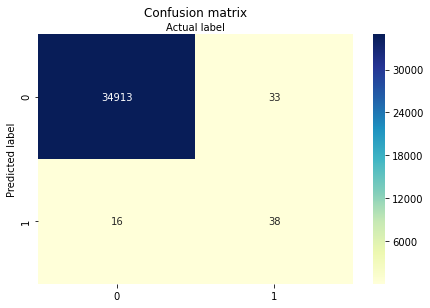

In [82]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

### We should go further and evaluate the model using model evaluation metrics such as accuracy, precision, and recall. These are calculated based on the confustion matrix:

In [83]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9986


### That is a fantastic accuracy score, isn't it?

In [84]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))

Precision: 0.7037037037037037
Recall: 0.5352112676056338
F1-score: 0.608


In [85]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34929
           1       0.70      0.54      0.61        71

    accuracy                           1.00     35000
   macro avg       0.85      0.77      0.80     35000
weighted avg       1.00      1.00      1.00     35000



### Although the accuracy is excellent, the model struggles with fraud detection and has not captured about 30 out of 71 fraudulent transactions.
### Accuracy in a highly unbalanced data set does not represent a correct value for the efficiency of a model. That's where precision, recall and more specifically F1-score as their combinations becomes important:

- *Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial*

- *Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.*

- *In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on.*

![](https://media2.giphy.com/media/5nj4ZZWl6QwneEaBX4/source.gif) <br>

*This notebook was inspired by several blogposts including:* 

- __"Logistic Regression in Python"__ by __Mirko Stojiljković__ available at* https://realpython.com/logistic-regression-python/ <br>
- __"Understanding Logistic Regression in Python"__ by __Avinash Navlani__ available at* https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python <br>
- __"Understanding Logistic Regression with Python: Practical Guide 1"__ by __Mayank Tripathi__ available at* https://datascience.foundation/sciencewhitepaper/understanding-logistic-regression-with-python-practical-guide-1 <br>
- __"Understanding Data Science Classification Metrics in Scikit-Learn in Python"__ by __Andrew Long__  available at* https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019 <br>


*Here are some great reads on these topics:* 
- __"Example of Logistic Regression in Python"__ available at* https://datatofish.com/logistic-regression-python/ <br>
- __"Building A Logistic Regression in Python, Step by Step"__ by __Susan Li__ available at* https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 <br>
- __"How To Perform Logistic Regression In Python?"__ by __Mohammad Waseem__ available at* https://www.edureka.co/blog/logistic-regression-in-python/ <br>
- __"Logistic Regression in Python Using Scikit-learn"__ by __Dhiraj K__ available at* https://heartbeat.fritz.ai/logistic-regression-in-python-using-scikit-learn-d34e882eebb1 <br>
- __"ML | Logistic Regression using Python"__ available at* https://www.geeksforgeeks.org/ml-logistic-regression-using-python/ <br>

*Here are some great videos on these topics:* 
- __"StatQuest: Logistic Regression"__ by __StatQuest with Josh Starmer__ available at* https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe <br>
- __"Linear Regression vs Logistic Regression | Data Science Training | Edureka"__ by __edureka!__ available at* https://www.youtube.com/watch?v=OCwZyYH14uw <br>
- __"Logistic Regression in Python | Logistic Regression Example | Machine Learning Algorithms | Edureka"__ by __edureka!__ available at* https://www.youtube.com/watch?v=VCJdg7YBbAQ <br>
- __"How to evaluate a classifier in scikit-learn"__ by __Data School__ available at* https://www.youtube.com/watch?v=85dtiMz9tSo <br>
- __"How to evaluate a classifier in scikit-learn"__ by __Data School__ available at* https://www.youtube.com/watch?v=85dtiMz9tSo <br>

___
![](https://media2.giphy.com/media/dNgK7Ws7y176U/200.gif) <br>


## Exercise: Logistic Regression in Engineering <br>

### Think of a few applications of Logistic Regression in Engineering?

#### _Make sure to cite any resources that you may use._ 

![](https://i.pinimg.com/originals/ad/65/d1/ad65d1c714f1e7abce9fe459c1d18d2d.jpg) <br>
